# Check Source:

- https://github.com/rlcode/reinforcement-learning/tree/master/1-grid-world
- https://github.com/dennybritz/reinforcement-learning
- https://github.com/Neo-47/Reinforcement-Learning-Algorithms/tree/master/Dynamic%20Programming

### Import Packages

In [15]:
import os,copy
import numpy as np
from gridworld import GridworldEnv
from plot_utils import plot_values

### Set Environment

In [25]:
# create env
env = GridworldEnv(shape=(10,10))

In [26]:
# show created gridworld
env._render()

# x is your position and T are the two terminal states.

T  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  x  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  T


### Preview

In [27]:
# print the state space and action space, total number of states and actions
print(f'state space: {env.observation_space}')
print(f'Action_space: {env.action_space}')
print(f'total number of states: {env.nS}')
print(f'total number of actions: {env.nA}')

state space: Discrete(100)
Action_space: Discrete(4)
total number of states: 100
total number of actions: 4


In [28]:
# looking at one-step dynamics of the Markov decision process (MDP)
prob, next_state, reward, done = env.P[1][0][0] 
prob, next_state, reward, done

(1.0, 1, -1.0, False)

### Iterative Policy Evaluation

In [20]:
def policy_evaluation(env, policy, gamma=1, theta=1e-8):
    V = np.zeros(env.nS)
    while True:
        delta = 0
        for s in range(env.nS):                                                  # loop for every state
            Vs = 0
            for a, action_prob in enumerate(policy[s]):                          # loop for every action
                for prob, next_state, reward, done in env.P[s][a]:               # loop for every probability of each possible reward and next state 
                    Vs += action_prob * prob * (reward + gamma * V[next_state])  # calculate Vscore
            delta = max(delta, np.abs(V[s]-Vs))                                  # calculate delta
            V[s] = Vs                                                            # update state-value ?? based on what ??
        if delta < theta:                                                        # check process, if all state has been optimized (small delta, than)
            break
    return V                                                                     # look for that video that show the gradual change

In [24]:
# set random policy
random_policy = np.ones([env.nS, env.nA]) / env.nA # equal prob on all

# evaluate the policy 
V = policy_evaluation(env, random_policy)
worldshape = (10,10)
plot_values(V,worldshape,figsize=(20,20))

ValueError: cannot reshape array of size 16 into shape (10,10)

### Iterative Policy Improvement

In [8]:
def q_from_v(env, V, s, gamma=1):
    q = np.zeros(env.nA)
    
    for a in range(env.nA):
        for prob, next_state, reward, done in env.P[s][a]:  
            q[a] += prob * (reward + gamma * V[next_state])
    return q

def policy_improvement(env, V, gamma=1):
    policy = np.zeros([env.nS, env.nA]) / env.nA
    for s in range(env.nS):
        q = q_from_v(env, V, s, gamma)
        
        # OPTION 1: construct a deterministic policy 
        # policy[s][np.argmax(q)] = 1
        
        # OPTION 2: construct a stochastic policy that puts equal probability on maximizing actions
        best_a = np.argwhere(q==np.max(q)).flatten()
        policy[s] = np.sum([np.eye(env.nA)[i] for i in best_a], axis=0)/len(best_a)
        
    return policy

def policy_iteration(env, gamma=1, theta=1e-8):
    policy = np.ones([env.nS, env.nA]) / env.nA
    while True:
        V = policy_evaluation(env, policy)
        policy_p = policy_improvement(env, V, gamma=1)
        
        if (policy==policy_p).all() == True:
            return policy, V
        
        # OPTION: stop if the value function estimates for successive policies has converged
        # if np.max(abs(policy_evaluation(env, policy) - policy_evaluation(env, new_policy))) < theta*1e2:
        #    break;
        
        else:
            policy = policy_p


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.5  0.5 ]
 [1.   0.   0.   0.  ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [1.   0.   0.   0.  ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.25 0.25 0.25 0.25]
 [0.   0.5  0.5  0.  ]
 [0.   0.   1.   0.  ]
 [1.   0.   0.   0.  ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.25 0.25 0.25 0.25]
 [0.   0.5  0.5  0.  ]
 [0.   0.5  0.5  0.  ]
 [0.   0.   1.   0.  ]
 [1.   0.   0.   0.  ]


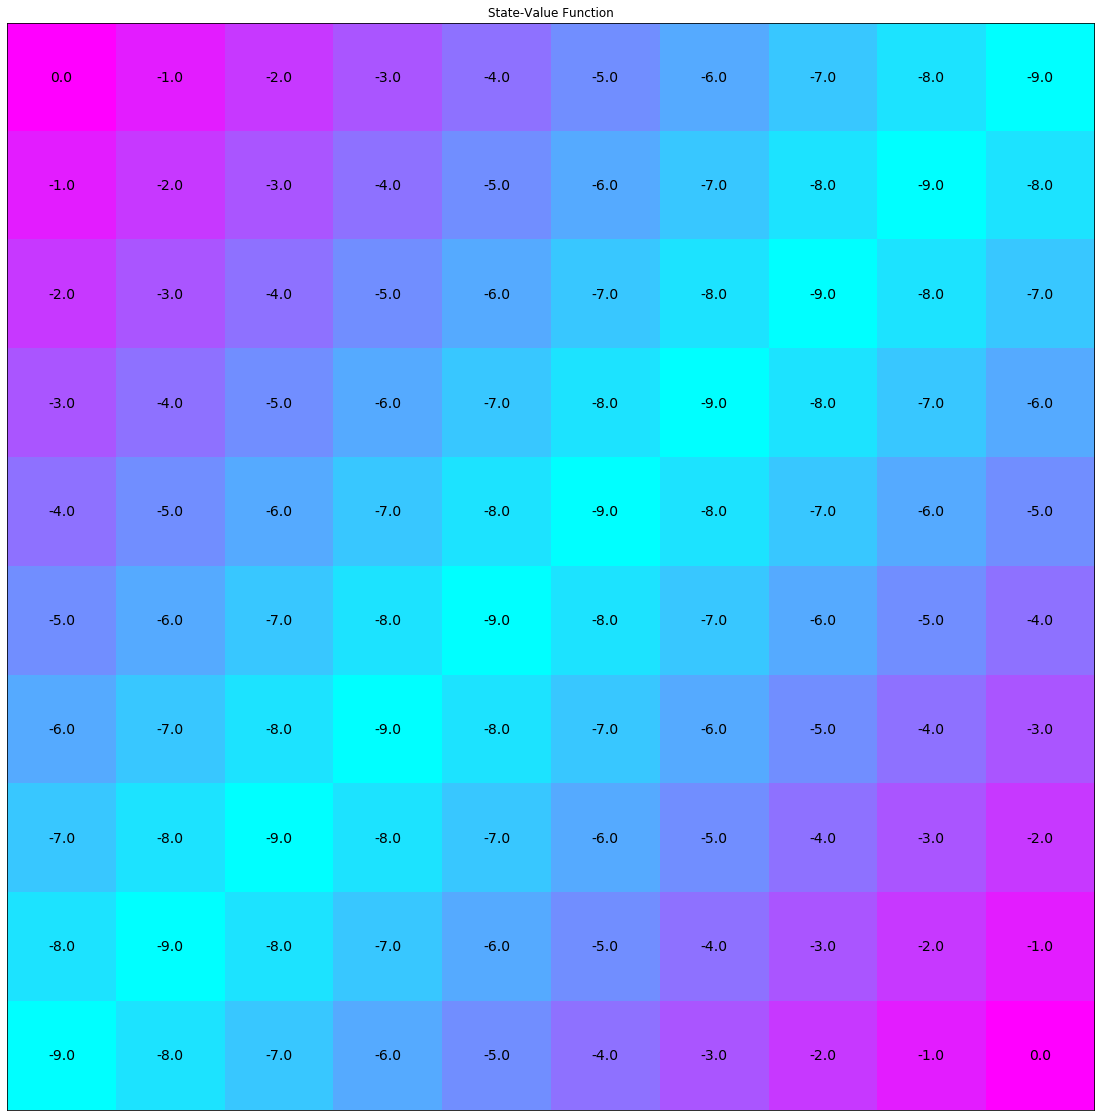

In [9]:
# obtain the optimal policy and optimal state-value function
policy_pi, V_pi = policy_iteration(env)

# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_pi,"\n")

plot_values(V_pi,worldshape,figsize=(20,20))

### Iterative Policy Evaluation with Truncated Process

In [10]:
def truncated_policy_evaluation(env, policy, V, max_it=1, gamma=1):
    counter = 0
    while True:
        for s in range(env.nS):                                                  # loop for every state
            v = 0
            q = q_from_v(env, V, s, gamma)
            for a, action_prob in enumerate(policy[s]):
                v += action_prob * q[a]
            V[s] = v
        if counter == max_it:                                                       
            return V  
        counter+=1                                            

In [11]:
def truncated_policy_iteration(env, max_it=1, gamma=1, theta=1e-8):    
    policy = np.zeros([env.nS, env.nA]) / env.nA
    V = np.zeros(env.nS)
    while True:
        policy = policy_improvement(env, V, gamma=1)
        V_old = copy.copy(V)
        V = truncated_policy_evaluation(env, policy, V, max_it, gamma)
        if max(abs(V-V_old)) < theta:
            return policy, V


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.5  0.5 ]
 [1.   0.   0.   0.  ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [1.   0.   0.   0.  ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.25 0.25 0.25 0.25]
 [0.   0.5  0.5  0.  ]
 [0.   0.   1.   0.  ]
 [1.   0.   0.   0.  ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.25 0.25 0.25 0.25]
 [0.   0.5  0.5  0.  ]
 [0.   0.5  0.5  0.  ]
 [0.   0.   1.   0.  ]
 [1.   0.   0.   0.  ]


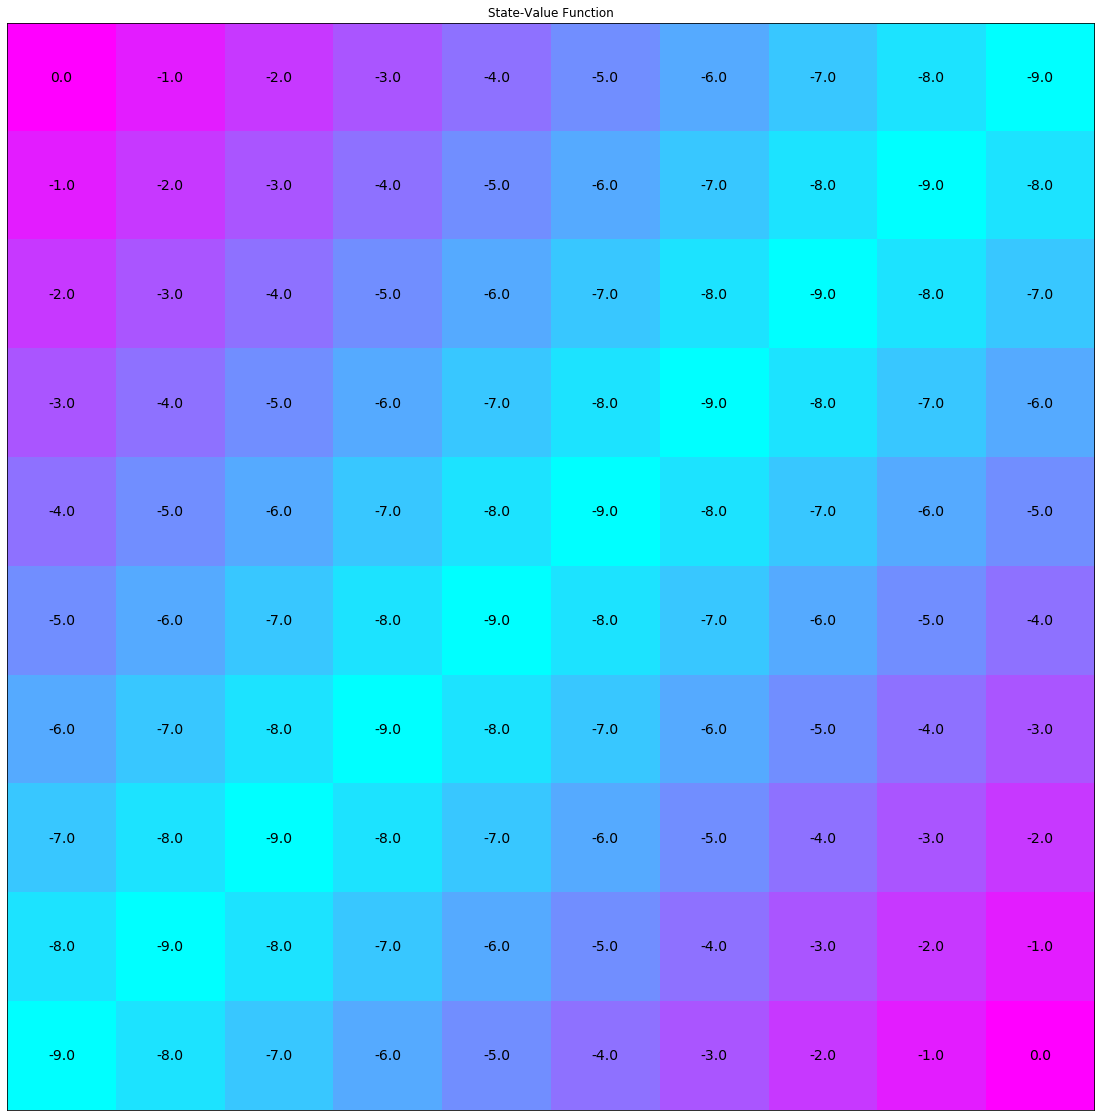

In [12]:
policy_tpi, V_tpi = truncated_policy_iteration(env, max_it=2)

# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_tpi,"\n")

# plot the optimal state-value function
plot_values(V_tpi,worldshape,figsize=(20,20))

### Iterative Value Optimization

In [13]:
def value_iteration(env, gamma=1, theta=1e-8):
    V = np.zeros(env.nS)
    while True:
        delta = 0
        for s in range(env.nS):
            v = V[s]
            V[s] = max(q_from_v(env, V, s, gamma))      # update value
            delta = max(delta,abs(V[s]-v))              # check how much value changed
        if delta < theta:
            break
    policy = policy_improvement(env, V, gamma)                
    return policy, V


Optimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):
[[0.25 0.25 0.25 0.25]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.   1.  ]
 [0.   0.   0.5  0.5 ]
 [1.   0.   0.   0.  ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.25 0.25 0.25 0.25]
 [0.   0.   1.   0.  ]
 [1.   0.   0.   0.  ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.25 0.25 0.25 0.25]
 [0.   0.5  0.5  0.  ]
 [0.   0.   1.   0.  ]
 [1.   0.   0.   0.  ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.5  0.   0.   0.5 ]
 [0.25 0.25 0.25 0.25]
 [0.   0.5  0.5  0.  ]
 [0.   0.5  0.5  0.  ]
 [0.   0.   1.   0.  ]
 [1.   0.   0.   0.  ]


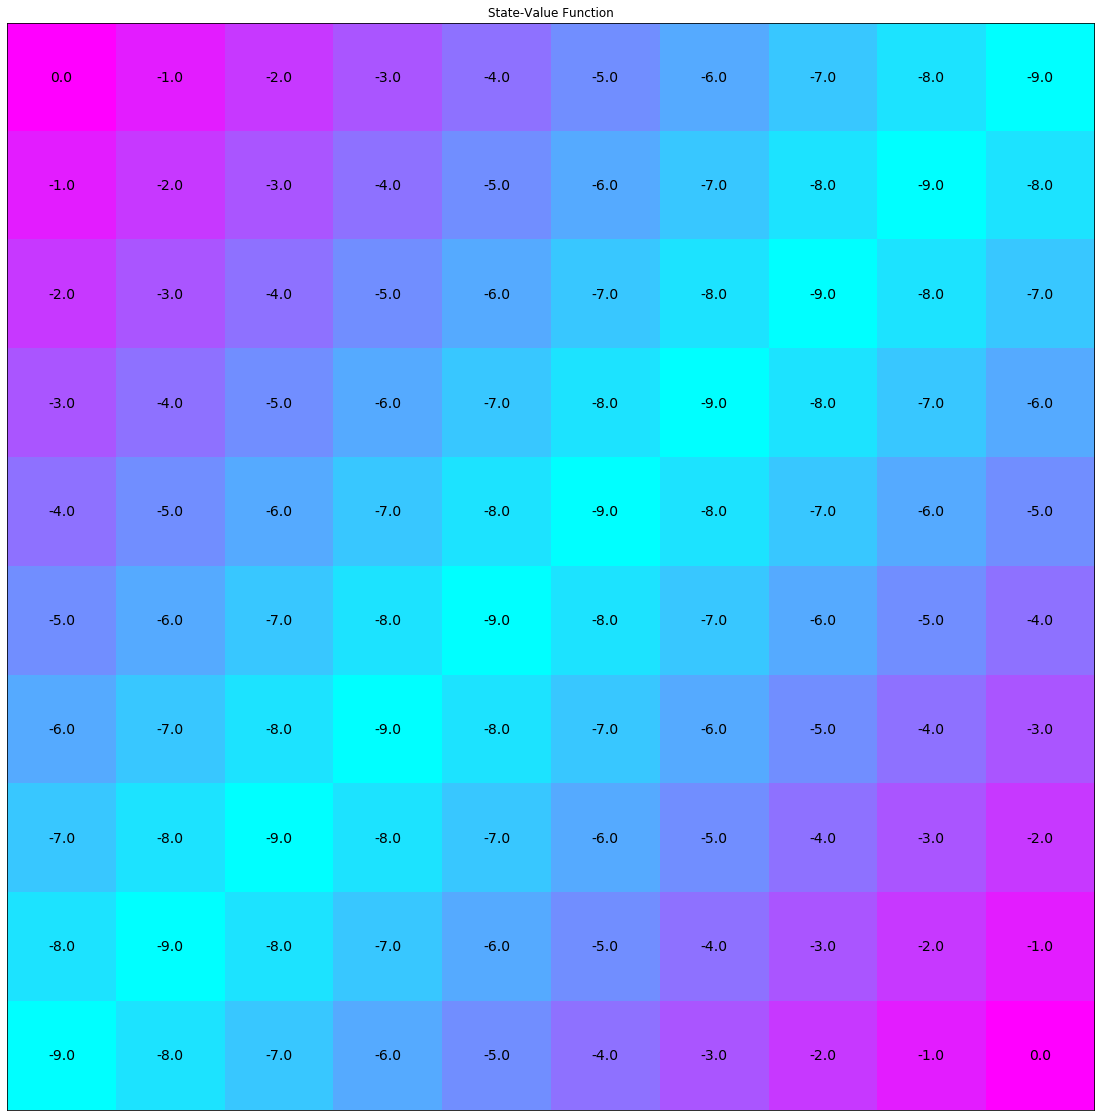

In [14]:
policy_vi, V_vi = value_iteration(env)

# print the optimal policy
print("\nOptimal Policy (LEFT = 0, DOWN = 1, RIGHT = 2, UP = 3):")
print(policy_vi,"\n")

# plot the optimal state-value function
plot_values(V_vi,worldshape,figsize=(20,20))